In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
train_file=r"E:\saquib D.S\census_income.csv"

In [3]:
ci_train=pd.read_csv(train_file)

In [4]:
ci_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
pd.crosstab(ci_train['education'],ci_train['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [6]:
ci_train.drop(['education'],axis=1,inplace=True)

In [7]:
ci_train['Y'].value_counts()

 <=50K    24720
 >50K      7841
Name: Y, dtype: int64

In [8]:
ci_train['Y']=(ci_train['Y']==' >50K').astype(int)
ci_train['Y'].value_counts()

0    24720
1     7841
Name: Y, dtype: int64

In [9]:
cat_cols=ci_train.select_dtypes(['object']).columns

In [10]:
cat_cols

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [11]:
ci_train.shape

(32561, 14)

In [12]:
for col in cat_cols:
    freqs=ci_train[col].value_counts()
    k=freqs.index[freqs>20]
    for cat in k:
        name=col+'_'+cat
        ci_train[name]=(ci_train[col]==cat).astype(int)
    del ci_train[col]
    print(col)

workclass
marital.status
occupation
relationship
race
sex
native.country


In [13]:
ci_train.shape

(32561, 79)

In [14]:
ci_train.isnull().sum()

age                                      0
fnlwgt                                   0
education.num                            0
capital.gain                             0
capital.loss                             0
hours.per.week                           0
Y                                        0
workclass_ Private                       0
workclass_ Self-emp-not-inc              0
workclass_ Local-gov                     0
workclass_ ?                             0
workclass_ State-gov                     0
workclass_ Self-emp-inc                  0
workclass_ Federal-gov                   0
marital.status_ Married-civ-spouse       0
marital.status_ Never-married            0
marital.status_ Divorced                 0
marital.status_ Separated                0
marital.status_ Widowed                  0
marital.status_ Married-spouse-absent    0
marital.status_ Married-AF-spouse        0
occupation_ Prof-specialty               0
occupation_ Craft-repair                 0
occupation_

In [15]:
#SPLITING THE DATA INTO TRAIN ..
#here trainig data is used to find the model

x_train=ci_train.drop(['Y'],axis=1)
y_train=ci_train['Y']

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
params={'class_weight':[None,'balanced'],
       'criterion':['entrophy','gini'],
       'max_depth':[None,5,10,15,20,25,30],
       'min_samples_leaf':[2,5,10,15,20],
       'min_samples_split':[5,10,25,30,35]}

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier()

In [20]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )

In [21]:
random_search.fit(x_train,y_train)

C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entrophy'

  FitFailedWarning)
C:\Users\mdsha\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [22]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
def report(results,n_top=3):
    for i in range(1,n_top +1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.5f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.888 (std: 0.00779)
Parameters: {'min_samples_split': 35, 'min_samples_leaf': 15, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.879 (std: 0.00723)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini', 'class_weight': None}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 25, 'criterion': 'entrophy', 'class_weight': None}

Model with rank: 4
Mean validation score: nan (std: nan)
Parameters: {'min_samples_split': 35, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entrophy', 'class_weight': None}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 20, 'criterion': 'entrophy', 'class_weight': None}



In [25]:
dtree=random_search.best_estimator_

In [26]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
from sklearn import tree

In [28]:
dotfile=open("mytree.dot",'w')

tree.export_graphviz(dtree,out_file=dotfile,feature_names=x_train.columns,
                    class_names=["0","1"],
                    proportion=True)
dotfile.close()

 :http://webgraphviz.com

In [29]:
##RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [30]:
clf=RandomForestClassifier()

In [31]:
param_dist ={'n_estimators':[100,200,300,400,500,600,700],
            # 'max_features':[5,10,15,20,25,30,35],
             # 'bootstrap':[True ,False],
              'class_weight':[None,'balanced'],
              'criterion':['entropy','gini'],
             # 'max_depth':[None,2,5,10,15,20],
           # 'min_samples_leaf':[2,5,6,8,9,10],
            #'min_samples_split':[2,5,10,15,20]
            }

In [32]:
x_train.shape

(32561, 78)

In [33]:
n_iter_search=10

random_search=RandomizedSearchCV(clf,param_distributions=param_dist,scoring='roc_auc',n_iter=n_iter_search,cv=5)

In [34]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [37]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.908 (std: 0.00366)
Parameters: {'n_estimators': 600, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.908 (std: 0.00344)
Parameters: {'n_estimators': 500, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.908 (std: 0.00358)
Parameters: {'n_estimators': 700, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.907 (std: 0.00365)
Parameters: {'n_estimators': 400, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.907 (std: 0.00345)
Parameters: {'n_estimators': 300, 'criterion': 'entropy', 'class_weight': None}



In [39]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
##FEATURES IMPORTANCES
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rf.feature_importances_})
feat_imp_df.sort_values('importance',ascending=False)

,features,importance
1,fnlwgt,0.167383
0,age,0.157939
2,education.num,0.102024
3,capital.gain,0.092882
5,hours.per.week,0.085575
13,marital.status_ Married-civ-spouse,0.065372
34,relationship_ Husband,0.038647
4,capital.loss,0.029477
14,marital.status_ Never-married,0.025968
22,occupation_ Exec-managerial,0.016358


In [43]:
var_name='education.num'
preds=rf.predict_proba(x_train)[:,1]

In [44]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

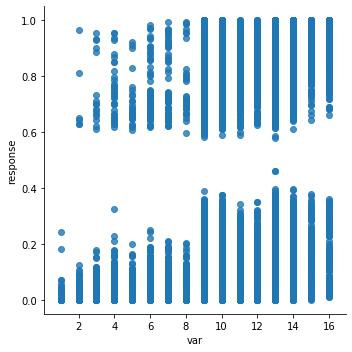

In [46]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [47]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

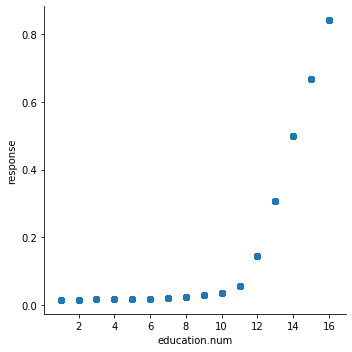

In [48]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})
sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)